In [96]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
#import torch
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
%matplotlib widget
#%matplotlib inline

In [76]:
data = scipy.io.loadmat('data/lwr/rho_bellshape_10grid_DS10_gn_eps005_solver2_ring.mat')

t = data['t'].flatten()[:,None]# 960 by 1
x = data['x'].flatten()[:,None]# 240 by 1
Exact_rho = np.real(data['rho']).T
Exact_rho = Exact_rho.astype(np.float32)

In [77]:
def Ueq(rho, rho_max=1, u_max=1):
    #rho_max=1
    #u_max = 1
    u = u_max * (1 - rho/rho_max)
    return rho * u

In [78]:
Exact_q = Ueq(Exact_rho)

(959, 239)


(array([ 4784.,  9621.,  7913.,  6937.,  8280.,  9743., 14442., 64596.,
        76208., 26677.]),
 array([-287.81216  , -247.35434  , -206.89651  , -166.43869  ,
        -125.980865 ,  -85.52304  ,  -45.065216 ,   -4.6073914,
          35.850433 ,   76.30826  ,  116.76608  ], dtype=float32),
 <a list of 10 Patch objects>)

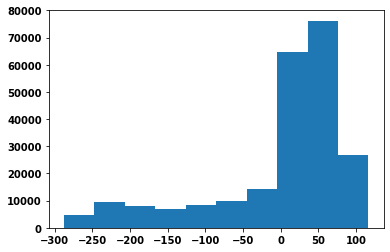

In [79]:
rho_t = (Exact_rho[1:, :-1] - Exact_rho[:1, :-1]) / (3/960)
rho_t = rho_t[:,:-1]
print(rho_t.shape)
plt.hist(rho_t.flatten())

(959, 239)


(array([4.55000e+02, 7.86850e+04, 1.44779e+05, 3.22700e+03, 1.07800e+03,
        4.50000e+02, 2.42000e+02, 1.23000e+02, 9.70000e+01, 6.50000e+01]),
 array([-7.7136035, -3.993603 , -0.2736023,  3.4463983,  7.166399 ,
        10.886399 , 14.6064005, 18.3264   , 22.046402 , 25.766401 ,
        29.486403 ], dtype=float32),
 <a list of 10 Patch objects>)

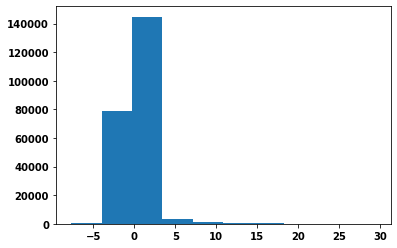

In [80]:
rho_x = (Exact_rho[:, 1:-1] - Exact_rho[:, :-2]) / (1/240)
rho_x = rho_x[:-1,:]
print(rho_x.shape)
plt.hist(rho_x.flatten())

In [81]:
q_x = (Exact_q[:, 1:-1] - Exact_q[:, :-2]) / (1/240)
q_x = q_x[:-1,:]
print(rho_x.shape)

(959, 239)


(array([ 4760.,  9616.,  7911.,  6939.,  8244.,  9740., 14440., 64676.,
        76219., 26656.]),
 array([-287.79208 , -247.34293 , -206.89377 , -166.44463 , -125.99547 ,
         -85.54631 ,  -45.097157,   -4.648001,   35.801155,   76.250305,
         116.69946 ], dtype=float32),
 <a list of 10 Patch objects>)

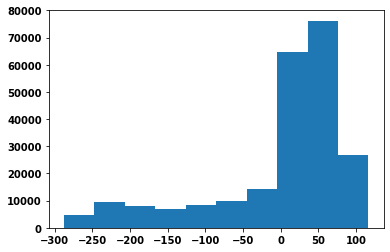

In [82]:
plt.hist((rho_t + q_x).flatten())

In [83]:
def get_f(rho_max, u_max, return_numerical_grad = False):
    rho = Exact_rho
    q = Ueq(rho, rho_max=rho_max, u_max=u_max)
    rho_t = (rho[1:, :] - rho[:-1, :]) / (3/960)
    
    q_x = (q[:, 1:] - q[:, :-1]) / (1/240)

    
    rho_x = (rho[:, 1:] - rho[:, :-1]) / (1/240)
    rho_xx = (rho_x[:, 1:] - rho_x[:, :-1]) / (1/240)
    
    min_shape_0 = min(rho_t.shape[0], rho_x.shape[0], rho_xx.shape[0])
    min_shape_1 = min(rho_t.shape[1], rho_x.shape[1], rho_xx.shape[1])
    
    rho_t = rho_t[:min_shape_0, :min_shape_1]
    q_x = q_x[:min_shape_0, :min_shape_1]
    rho_xx = rho_xx[:min_shape_0, :min_shape_1]
    
    f = (rho_t + q_x - 0.005*rho_xx)**2
    
        
    
    return f, rho_xx

In [84]:
f, rho_xx = get_f(1,1)
f

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.64007015e-05, 5.35848667e-05, 3.88619155e-05, ...,
        1.89123719e-04, 4.94680389e-05, 1.68418206e-04],
       [1.22999569e-04, 1.80142688e-05, 1.07745225e-04, ...,
        2.44319584e-04, 3.30454350e-05, 1.43990663e-04],
       [1.26268176e-04, 6.52556701e-05, 1.71664451e-05, ...,
        1.13060632e-04, 2.21313458e-04, 6.12664007e-05]], dtype=float32)

(array([7.20000e+01, 1.04000e+02, 1.99000e+02, 5.19000e+02, 6.48400e+03,
        2.20738e+05, 6.94000e+02, 2.18000e+02, 1.02000e+02, 7.10000e+01]),
 array([-1726.8516 , -1389.2    , -1051.5485 ,  -713.8969 ,  -376.24536,
          -38.59381,   299.05774,   636.7093 ,   974.36084,  1312.0125 ,
         1649.664  ], dtype=float32),
 <a list of 10 Patch objects>)

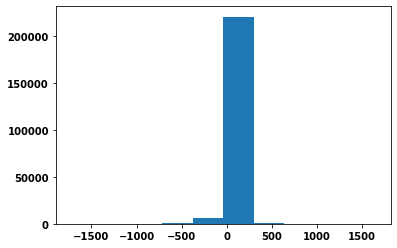

In [85]:
plt.hist(rho_xx.flatten())

In [57]:
N_rhomax = 30
N_umax = 30
rhomax_bounds = [0.001, 2]
umax_bounds = [0.001, 2]

F = np.empty((N_rhomax, N_umax))

rhomaxs = np.linspace(rhomax_bounds[0], rhomax_bounds[1], N_rhomax)
umaxs = np.linspace(umax_bounds[0], umax_bounds[1], N_umax)

for i, rhomax_k in enumerate(rhomaxs):
    if i % 10 == 0:
        print(i)
    for j, umax_k in enumerate(umaxs):
        F[i,j] = np.mean(get_f(rhomax_k, umax_k))

0
10
20


In [14]:
F[np.where(F>1)] = 1

In [15]:
X, Y = np.meshgrid(rhomaxs, umaxs)

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, F, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('rho_max')
ax.set_ylabel('u_max')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'u_max')

In [91]:
with open("test_21loop_100000.npy","rb") as f:
    a = np.load(f)

In [92]:
x = np.linspace(0.1,2,50)
y = np.linspace(0.1,2,50)

In [93]:
X,Y = np.meshgrid(x,y)

In [94]:
a_temp = a
a_temp[np.where(a>0.5)] = 0.5

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'u_max')

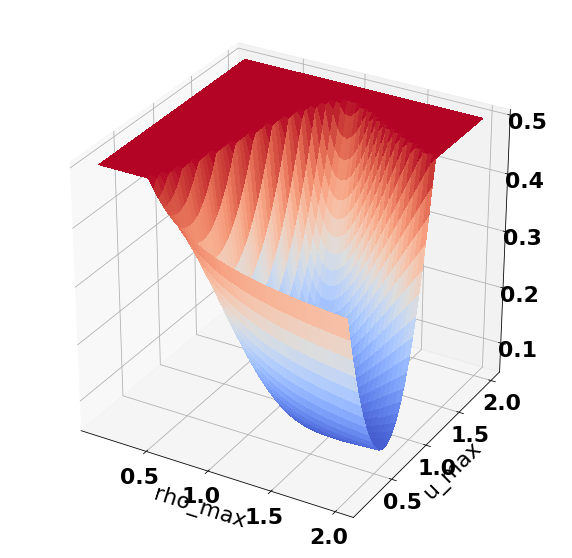

In [97]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, a_temp, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('rho_max')
ax.set_ylabel('u_max')

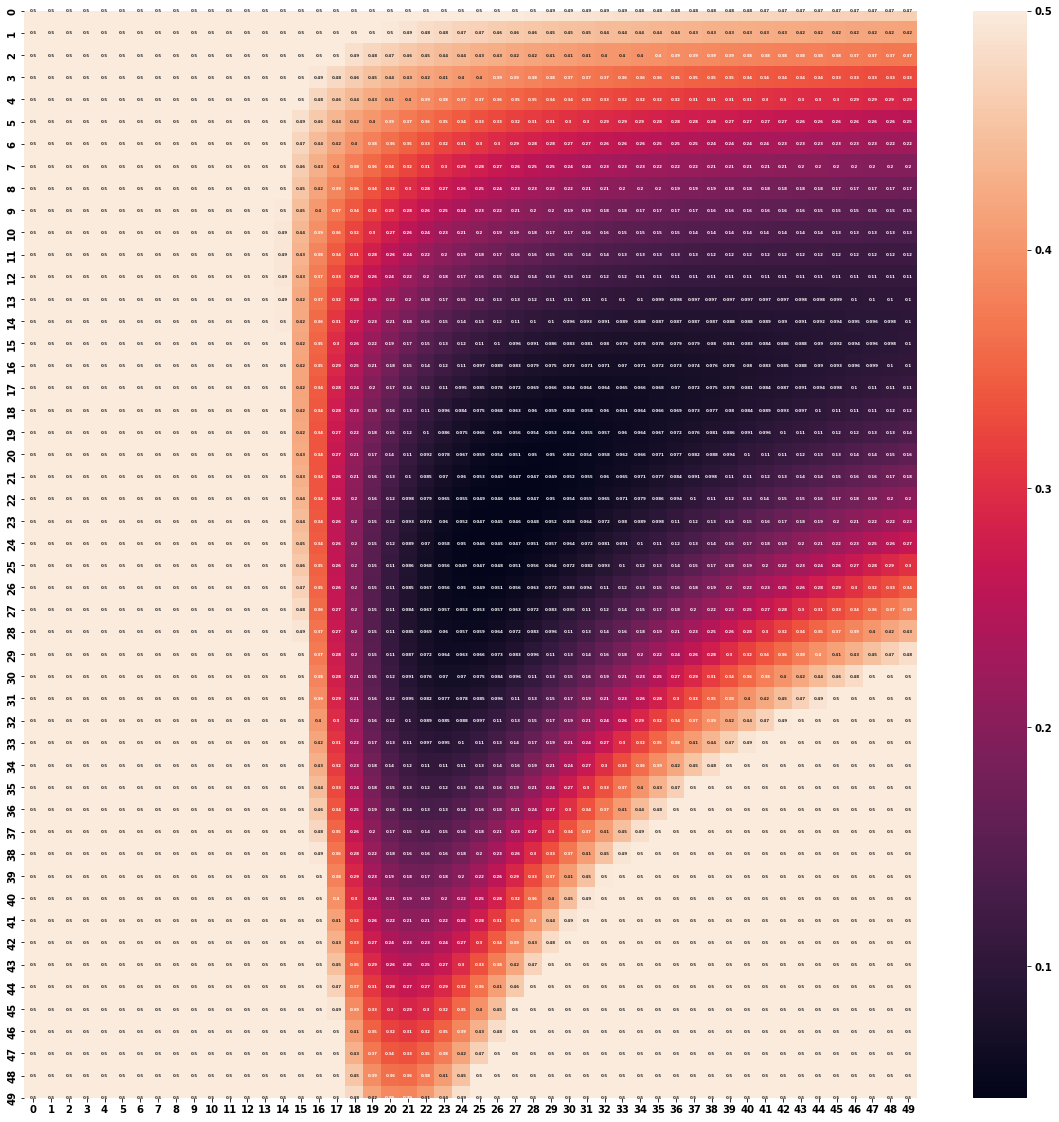

In [42]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(a_temp,annot=True,annot_kws={"fontsize":4})
plt.savefig("heatmap_f.png", dpi=300)

In [12]:
def get_f_torch(rho_max, u_max,  return_numerical_grad = False):
    rho = torch.from_numpy(Exact_rho)
    u = u_max * (torch.tensor(1) - rho/rho_max)
    q = rho * u
    rho_t = (rho[1:, :] - rho[:-1, :]) / (3/960)
    
    q_x = (q[:, 1:] - q[:, :-1]) / (1/240)

    
    rho_x = (rho[:, 1:] - rho[:, :-1]) / (1/240)
    rho_xx = (rho_x[:, 1:] - rho_x[:, :-1]) / (1/240)
    
    min_shape_0 = min(rho_t.shape[0], rho_x.shape[0], rho_xx.shape[0])
    min_shape_1 = min(rho_t.shape[1], rho_x.shape[1], rho_xx.shape[1])
    
    rho_t = rho_t[:min_shape_0, :min_shape_1]
    q_x = q_x[:min_shape_0, :min_shape_1]
    rho_xx = rho_xx[:min_shape_0, :min_shape_1]
    
    f = (rho_t + q_x - 0.005*rho_xx)**2
    
        
    
    return f

In [28]:
# use pytorch to minimize f
rhomax = torch.tensor(1.5, requires_grad=True, dtype=torch.float32)
umax = torch.tensor(1.5, requires_grad=True, dtype=torch.float32)
#tau = torch.tensor(0.001, requires_grad=True, dtype=torch.float32)

optimizer = torch.optim.Adam([rhomax, umax], lr=0.001)


for epoch in range(50000):
    f = get_f_torch(rhomax, umax, tau)
    loss = f.mean()
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        print_str = f"epoch={epoch:d}, rhomax={rhomax:.3f}, umax={umax:.3f}, tau={tau:.3f}"
        print_str += f", dLdrhomax={rhomax.grad:.3e}, dLdumax={umax.grad:.3e}"
        print(print_str)
    
    optimizer.zero_grad()
    

epoch=0, rhomax=1.499, umax=1.499, tau=0.001, dLdrhomax=1.237e+00, dLdumax=1.369e+00
epoch=100, rhomax=1.401, umax=1.404, tau=0.001, dLdrhomax=1.078e+00, dLdumax=1.053e+00
epoch=200, rhomax=1.311, umax=1.321, tau=0.001, dLdrhomax=9.165e-01, dLdumax=7.890e-01
epoch=300, rhomax=1.229, umax=1.251, tau=0.001, dLdrhomax=7.535e-01, dLdumax=5.768e-01
epoch=400, rhomax=1.157, umax=1.195, tau=0.001, dLdrhomax=5.895e-01, dLdumax=4.142e-01
epoch=500, rhomax=1.097, umax=1.149, tau=0.001, dLdrhomax=4.297e-01, dLdumax=2.965e-01
epoch=600, rhomax=1.051, umax=1.112, tau=0.001, dLdrhomax=2.852e-01, dLdumax=2.161e-01
epoch=700, rhomax=1.019, umax=1.083, tau=0.001, dLdrhomax=1.693e-01, dLdumax=1.630e-01
epoch=800, rhomax=0.999, umax=1.058, tau=0.001, dLdrhomax=8.904e-02, dLdumax=1.272e-01
epoch=900, rhomax=0.988, umax=1.036, tau=0.001, dLdrhomax=4.083e-02, dLdumax=1.014e-01
epoch=1000, rhomax=0.982, umax=1.017, tau=0.001, dLdrhomax=1.527e-02, dLdumax=8.140e-02
epoch=1100, rhomax=0.981, umax=1.001, tau=0.

epoch=9300, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-2.119e-08, dLdumax=1.636e-07
epoch=9400, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-2.119e-08, dLdumax=1.636e-07
epoch=9500, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-5.611e-08, dLdumax=1.161e-07
epoch=9600, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-5.611e-08, dLdumax=1.161e-07
epoch=9700, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-5.611e-08, dLdumax=1.161e-07
epoch=9800, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-5.611e-08, dLdumax=1.161e-07
epoch=9900, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-5.611e-08, dLdumax=1.161e-07
epoch=10000, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-5.611e-08, dLdumax=1.161e-07
epoch=10100, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-5.611e-08, dLdumax=1.161e-07
epoch=10200, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-6.519e-08, dLdumax=6.100e-08
epoch=10300, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-6.519e-08, dLdumax=6.100e-08
epoch=10400, rhom

epoch=18500, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=1.648e-06, dLdumax=1.816e-07
epoch=18600, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-1.383e-04, dLdumax=-2.813e-05
epoch=18700, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=9.951e-07, dLdumax=2.238e-07
epoch=18800, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-4.060e-04, dLdumax=-8.578e-05
epoch=18900, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-2.297e-06, dLdumax=-5.848e-07
epoch=19000, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-3.379e-04, dLdumax=-7.817e-05
epoch=19100, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-1.174e-06, dLdumax=-2.382e-07
epoch=19200, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-6.085e-05, dLdumax=-1.559e-05
epoch=19300, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-3.054e-07, dLdumax=-1.399e-07
epoch=19400, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=1.172e-05, dLdumax=3.193e-06
epoch=19500, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-1.405e-06, dLdumax=-4.303e-07
epoch

epoch=27600, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=3.373e-06, dLdumax=1.315e-06
epoch=27700, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-8.621e-06, dLdumax=-3.448e-06
epoch=27800, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-1.837e-06, dLdumax=-6.952e-07
epoch=27900, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=1.404e-05, dLdumax=5.615e-06
epoch=28000, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-3.789e-06, dLdumax=-1.527e-06
epoch=28100, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-3.021e-06, dLdumax=-1.217e-06
epoch=28200, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-7.516e-07, dLdumax=-4.693e-07
epoch=28300, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=1.137e-05, dLdumax=4.649e-06
epoch=28400, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=1.469e-06, dLdumax=6.707e-07
epoch=28500, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=3.555e-05, dLdumax=1.416e-05
epoch=28600, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-9.646e-07, dLdumax=-5.953e-07
epoch=287

epoch=36800, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=3.535e-04, dLdumax=1.406e-04
epoch=36900, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=1.874e-06, dLdumax=8.155e-07
epoch=37000, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=2.743e-04, dLdumax=1.088e-04
epoch=37100, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-4.551e-07, dLdumax=-1.083e-07
epoch=37200, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-4.370e-05, dLdumax=-1.738e-05
epoch=37300, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-1.201e-07, dLdumax=-1.175e-07
epoch=37400, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-5.410e-05, dLdumax=-2.142e-05
epoch=37500, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=1.062e-06, dLdumax=4.547e-07
epoch=37600, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-1.400e-05, dLdumax=-5.430e-06
epoch=37700, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-1.618e-06, dLdumax=-5.641e-07
epoch=37800, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=1.949e-05, dLdumax=7.882e-06
epoch=379

epoch=46000, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-4.464e-05, dLdumax=-1.770e-05
epoch=46100, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-4.740e-07, dLdumax=-1.623e-07
epoch=46200, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-3.124e-05, dLdumax=-1.228e-05
epoch=46300, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=1.241e-06, dLdumax=4.810e-07
epoch=46400, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-4.290e-05, dLdumax=-1.701e-05
epoch=46500, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-7.038e-07, dLdumax=-3.579e-07
epoch=46600, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-9.954e-06, dLdumax=-3.873e-06
epoch=46700, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-2.770e-06, dLdumax=-1.028e-06
epoch=46800, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=4.948e-07, dLdumax=2.261e-07
epoch=46900, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=5.184e-06, dLdumax=2.296e-06
epoch=47000, rhomax=0.987, umax=0.931, tau=0.001, dLdrhomax=-3.197e-06, dLdumax=-1.229e-06
epoch

In [14]:
f", dLdrhomax={rhomax.grad:.3f}, dLdumax={umax.grad:.3f}, dLdtau={tau.grad:.3f}"

TypeError: unsupported format string passed to NoneType.__format__

In [20]:
tau.grad

In [26]:
loss

tensor(0.5609, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [98]:
x_id = np.arange(50)
y_id = np.argmin(a_temp, axis=0)
y_value = np.min(a, axis=0)

In [99]:
y

array([0.1       , 0.13877551, 0.17755102, 0.21632653, 0.25510204,
       0.29387755, 0.33265306, 0.37142857, 0.41020408, 0.44897959,
       0.4877551 , 0.52653061, 0.56530612, 0.60408163, 0.64285714,
       0.68163265, 0.72040816, 0.75918367, 0.79795918, 0.83673469,
       0.8755102 , 0.91428571, 0.95306122, 0.99183673, 1.03061224,
       1.06938776, 1.10816327, 1.14693878, 1.18571429, 1.2244898 ,
       1.26326531, 1.30204082, 1.34081633, 1.37959184, 1.41836735,
       1.45714286, 1.49591837, 1.53469388, 1.57346939, 1.6122449 ,
       1.65102041, 1.68979592, 1.72857143, 1.76734694, 1.80612245,
       1.84489796, 1.88367347, 1.92244898, 1.96122449, 2.        ])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

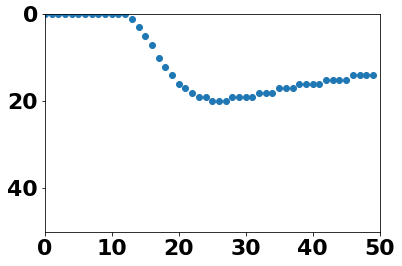

In [100]:
plt.scatter(x_id,y_id)
plt.xlim([0,50])
plt.ylim([0,50])
ax = plt.gca()
ax.invert_yaxis()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

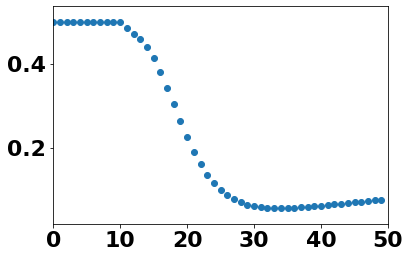

In [101]:
plt.scatter(x_id,y_value)
plt.xlim([0,50])
ax = plt.gca()
#ax.set_yscale('log')

In [102]:
x_min = np.argmin(y_value)
print("rho_max_opt: ", x[x_min])
print("u_max_opt:", y[y_id[x_min]])

rho_max_opt:  1.379591836734694
u_max_opt: 0.7979591836734694


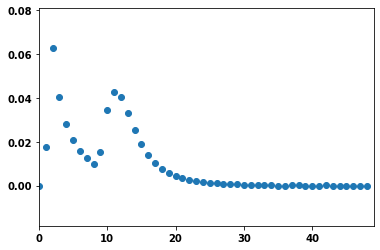

In [30]:
plt.scatter(x[:-1],abs(y_value[1:]-y_value[:-1]))
plt.xlim([0,49])
ax = plt.gca()


In [32]:
np.argsort(y_value)

array([46, 40, 41, 47, 45, 48, 39, 42, 44, 49, 43, 38, 37, 36, 35, 34, 33,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])